<a href="https://colab.research.google.com/github/vivianusdjpy/Gender-and-Age-Detection/blob/master/Updated_Age_and_Eye_Detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/vivianusdjpy/Gender-and-Age-Detection

fatal: destination path 'Gender-and-Age-Detection' already exists and is not an empty directory.


Gender :Female and Age  = (25-32)


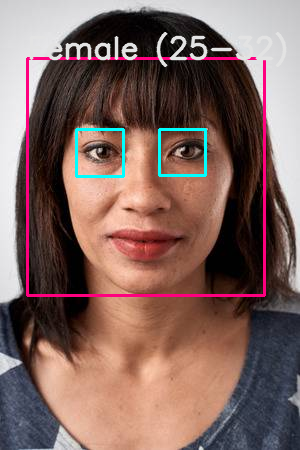

In [2]:
import cv2
import os
import argparse
import numpy as np
from google.colab.patches import cv2_imshow

face_classifier = cv2.CascadeClassifier("/content/haarcascade_frontalface_default.xml")
eye_classifier = cv2.CascadeClassifier("/content/haarcascade_eye.xml")

# loading the image
# image = cv2.imread("/content/drive/My Drive/Deep Learning/CNN/Face_Reconization/Test/bhondu/bhondu.jpg")
image = cv2.imread("/content/8.jpg")
# image = cv2.imread("/content/drive/My Drive/Deep Learning/CNN/Age_Classification/brothers.jpg")



gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)


faceProto="/content/Gender-and-Age-Detection/opencv_face_detector.pbtxt"
faceModel="/content/Gender-and-Age-Detection/opencv_face_detector_uint8.pb"
ageProto="/content/Gender-and-Age-Detection/age_deploy.prototxt"
ageModel="/content/Gender-and-Age-Detection/age_net.caffemodel"
genderProto="/content/Gender-and-Age-Detection/gender_deploy.prototxt"
genderModel="/content/Gender-and-Age-Detection/gender_net.caffemodel"


MODEL_MEAN_VALUES=(78.4263377603, 87.7689143744, 114.895847746)
ageList=['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
genderList=['Male','Female']
exact_Ages = np.arange(0,90,89)


faceNet=cv2.dnn.readNet(faceModel,faceProto)
ageNet=cv2.dnn.readNet(ageModel,ageProto)
genderNet=cv2.dnn.readNet(genderModel,genderProto)

# faceNet=cv2.dnn.readNetFromCaffe(faceProto,faceModel)
# #ageNet=cv2.dnn.readNetFromCaffe(ageProto,ageModel)
# genderNet=cv2.dnn.readNetFromCaffe(genderProto,genderModel)

# readNetFromCaffe


# detecting the face
faces = face_classifier.detectMultiScale(gray,1.3,5)

if faces is ():
  print("No faces found")

else :
  for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h), (127,0,255), 2)
    # cv2_imshow(image)
    cv2.waitKey()
    roi_gray = gray[y:y+h, x:x+w]
    roi_colr = image[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
      cv2.rectangle(roi_colr, (ex,ey), (ex+ew,ey+eh), (255,255,0),2)
      # cv2_imshow(image)
      cv2.waitKey()

      blob=cv2.dnn.blobFromImage(roi_colr, 1.0, (227,227), MODEL_MEAN_VALUES, swapRB=False)
      genderNet.setInput(blob)
      genderPreds=genderNet.forward()
      gender=genderList[genderPreds[0].argmax()]
      # print(f'Gender: {gender}')

      ageNet.setInput(blob)
      agePreds=ageNet.forward()
      age=ageList[agePreds[0].argmax()]
      #Exact_Age = exact_Ages[agePreds[0]]
      # print(f'Age: {age[1:-1]} years')
      #print("Exact_Age:"+ Exact_Age)


font = cv2.FONT_HERSHEY_SIMPLEX
overlay_text = "%s %s" % (gender, age)
cv2.putText(image, overlay_text, (x, y), font, 1, (227, 227, 227), 2, cv2.LINE_AA)

print(f"Gender :{gender} and Age  = {age}")
cv2_imshow(image)
# cv2.destroyAllWindows()